<a href="https://colab.research.google.com/github/gustavor10silva/alura_imersao_dados_4/blob/main/3_cruzamento_de_bases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Importando bibliotecas

In [1]:
import pandas as pd # para trabalhar com dataframes
!pip install geopandas
import geopandas as gpd # para trabalhar com enderecos geolocalizados

from geopy.geocoders import Nominatim # para converter endereco para location, com a latitude e longitude que precisamos
from geopy.extra.rate_limiter import RateLimiter # para fazer a conversao dos enderecos em larga escala
from tqdm import tqdm # para vermos uma barra de progresso na conversao dos enderecos, que é demorada
from shapely.geometry import Point # para construirmos os pontos de longitude e latitude

import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount("/content/drive") # para pegarmos o df_gold, que é a base de dados de imoveis depois da limpeza

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 13.7 MB/s 
     |████████████████████████████████| 6.3 MB 53.9 MB/s 
     |████████████████████████████████| 16.7 MB 53.5 MB/s 
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2 Dados do IBGE - Censo 2010

Os dados do IBGE que serão usados são os dados do Censo de 2010 do município de São Paulo.

Esses dados trazem, essencialmente, informações de infraestrutura, iluminação, saneamento, alfabetização, volume populacional, características da população e muitas outras variáveis separadas por setor censitário. Cada setor é identificado na coluna Cod_setor

As tabelas e variáveis de cada tabela podem ser consultada nesse [link](https://drive.google.com/file/d/1WVTqfKtHOOk5X1AWaSOn6NLaO7cix2m4/view).

Nesta seção do notebook, teremos uma subseção para cada tabela do Censo de 2021 que será utilizada para agregar informações na base de dados dos imóveis

## 2.1 Tabela Basico_SP1.csv

Essa tabela possui dados básicos. Usaremos as variáveis abaixo:

* Cod_setor

* Situação_setor

* V001

* V002

* V003

* V004

* V005

* V006

O significado dessas variáveis pode ser consultado na tabela:

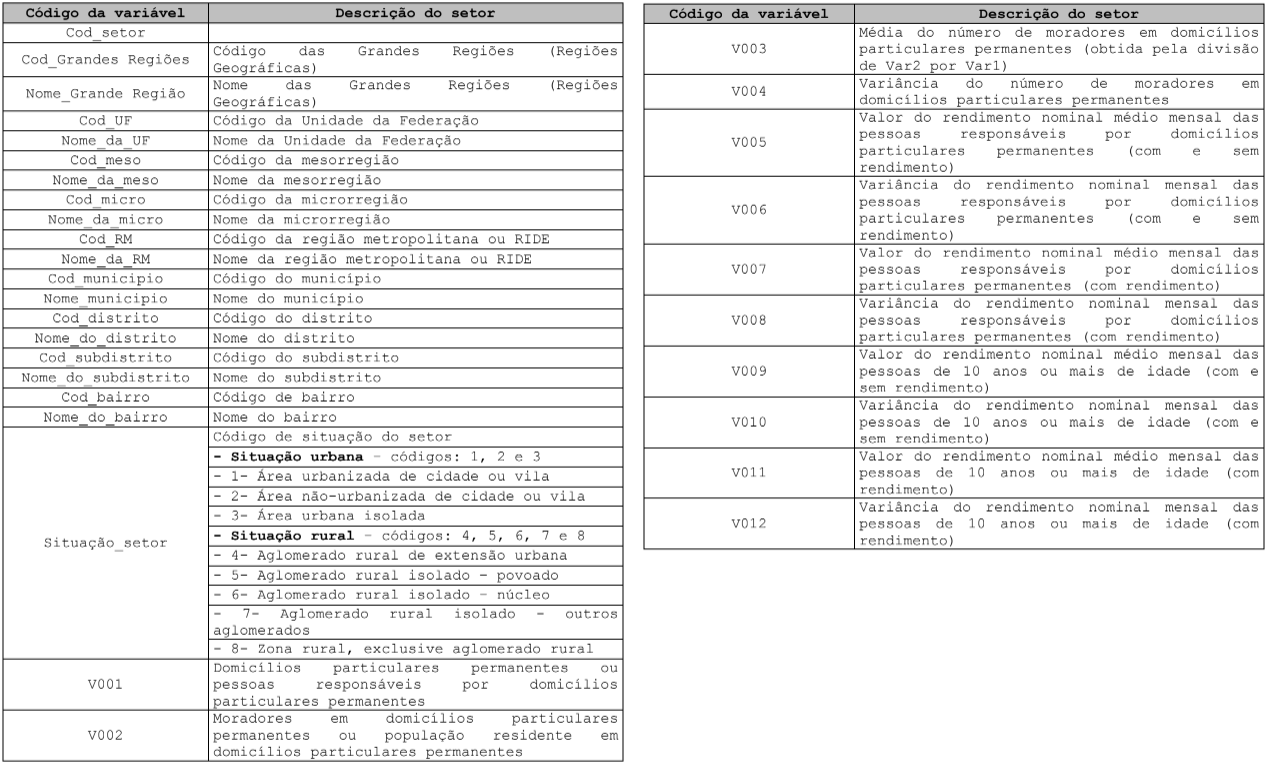

Vamos abrir o arquivo:

In [ ]:
basico_sp1 = pd.read_csv('https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv',
                      encoding='ISO-8859-1',
                      sep=';', thousands='.', decimal=',')
basico_sp1.dropna(how='all', axis=1, inplace=True)
basico_sp1

,Cod_setor,Cod_Grandes Regiï¿½es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18358,355030896000243,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.50,2.61,772.09,168751.10,814.52,143188.21,467.46,191332.48,699.95,123399.08
18359,355030896000244,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.87,2.49,692.50,239941.27,812.93,182516.20,439.33,194034.99,702.10,124952.38
18360,355030896000245,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,3.90,2.54,630.06,329705.22,843.31,260395.90,347.60,228162.66,767.50,181129.99
18361,355030896000246,3,Regiï¿½o Sudeste,35,Sï¿½o Paulo,3515,Metropolitana de Sï¿½o Paulo,35061,Sï¿½o Paulo,20,...,4.29,4.21,597.37,349101.00,908.00,244391.67,397.76,436942.16,854.20,550319.43


In [ ]:
basico_sp1.columns

Index(['Cod_setor', 'Cod_Grandes Regiï¿½es', 'Nome_Grande_Regiao', 'Cod_UF',
       'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
       'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio',
       'Cod_distrito', 'Nome_do_distrito', 'Cod_subdistrito',
       'Nome_do_subdistrito', 'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor',
       'Tipo_setor', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006', 'V007',
       'V008', 'V009', 'V010', 'V011', 'V012'],
      dtype='object')

Agora, segue a seleção de variáveis:

In [ ]:
basico_sp1 = basico_sp1[['Cod_setor', 'Situacao_setor', 'V001', 'V002', 'V003', 'V004', 'V005', 'V006']]
basico_sp1.head()

,Cod_setor,Situacao_setor,V001,V002,V003,V004,V005,V006
0,355030801000001,1,266.0,800.0,3.01,2.32,2091.32,8532451.78
1,355030801000002,1,306.0,913.0,2.98,2.09,1650.09,3983441.31
2,355030801000003,1,189.0,625.0,3.31,3.08,1280.43,5474593.06
3,355030801000004,1,181.0,572.0,3.16,2.26,1119.59,3572955.10
4,355030801000005,1,240.0,754.0,3.14,2.35,1416.90,2240207.58


In [ ]:
basico_sp1.to_csv('/content/drive/MyDrive/Alura/imersao_dados4/basico_sp1_tratado.csv')

## 2.2 Tabela Domicilio01_SP1.csv

As variáveis que serão utilizadas dessa tabela são:

* **Cod_setor:** código do setor censitário

* **V001:** Domicílios particulares e domicílios coletivos

* **V002:** Domicílios particulares permanentes

* **V012:** Domicílios particulares permanentes com abastecimento de água da rede geral

* **V017:** Domicílios particulares permanentes com banheiro de uso exclusivo dos moradores ou sanitário e esgotamento sanitário via rede geral de esgoto ou pluvial

* **V023:** Domicílios particulares permanentes sem banheiro de uso exclusivo dos moradores e nem sanitário

* **V035:** Domicílios particulares permanentes com lixo coletado

* **V043:** Domicílios particulares permanentes com energia elétrica

In [ ]:
domicilio01_sp1 = pd.read_csv('/content/drive/MyDrive/Alura/imersao_dados4/Base informaçoes setores2010 universo SP_Capital/CSV/Domicilio01_SP1.csv',
                              encoding='ISO-8859-1',
                              sep=';', thousands='.', decimal=',')
domicilio01_sp1.head()

,Cod_setor,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,...,V233,V234,V235,V236,V237,V238,V239,V240,V241,Unnamed: 243
0,355030801000001,1,268,266,203,20,11,136,7,116,...,0,1,1,0,0,0,0,0,0,NaN
1,355030801000002,1,306,306,298,8,0,194,10,85,...,0,0,0,0,0,0,0,0,0,NaN
2,355030801000003,1,189,189,177,1,7,135,1,50,...,0,0,0,0,0,0,0,0,0,NaN
3,355030801000004,1,181,181,154,4,23,76,2,87,...,0,0,0,0,0,0,0,0,0,NaN
4,355030801000005,1,240,240,226,1,12,105,4,112,...,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
domicilio01_sp1 = domicilio01_sp1[['Cod_setor', 'V001', 'V002', 'V012', 'V017', 'V023', 'V035', 'V043']]
domicilio01_sp1.head()

,Cod_setor,V001,V002,V012,V017,V023,V035,V043
0,355030801000001,268,266,266,266,0,265,266
1,355030801000002,306,306,306,306,0,306,306
2,355030801000003,189,189,189,187,0,189,189
3,355030801000004,181,181,181,181,0,181,181
4,355030801000005,240,240,240,240,0,240,240


In [ ]:
domicilio01_sp1.to_csv('/content/drive/MyDrive/Alura/imersao_dados4/Domicilio01_SP1_tratado.csv')

## 2.3 Tabela Pessoa01_SP1.csv

As variáveis que serão utilizadas dessa tabela são:

* **Cod_setor**

* **V001:** Pessoas alfabetizadas com 5 ou mais anos de idade

In [ ]:
pessoa01_sp1 = pd.read_csv('/content/drive/MyDrive/Alura/imersao_dados4/Base informaçoes setores2010 universo SP_Capital/CSV/Pessoa01_SP1.csv',
                              encoding='ISO-8859-1',
                              sep=';', thousands='.', decimal=',')
pessoa01_sp1.head()

,Cod_setor,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,...,V076,V077,V078,V079,V080,V081,V082,V083,V084,V085
0,355030801000001,1,742,1,6,2,1,7,7,12,...,6,31,266,152,201,21,23,18,36,6
1,355030801000002,1,833,5,10,6,12,10,12,11,...,6,32,297,182,237,13,18,10,29,3
2,355030801000003,1,575,3,6,6,7,2,6,8,...,2,19,185,109,143,32,18,19,37,1
3,355030801000004,1,530,1,5,9,5,6,6,5,...,2,17,178,100,162,10,11,22,16,3
4,355030801000005,1,678,3,8,4,2,11,10,8,...,2,22,232,133,206,17,15,14,25,4


In [ ]:
pessoa01_sp1 = pessoa01_sp1[['Cod_setor', 'V001']]
pessoa01_sp1.head()

,Cod_setor,V001
0,355030801000001,742
1,355030801000002,833
2,355030801000003,575
3,355030801000004,530
4,355030801000005,678


In [ ]:
pessoa01_sp1.to_csv('/content/drive/MyDrive/Alura/imersao_dados4/Pessoa01_sp1_tratado.csv')

## 2.4 Tabela Pessoa03_SP1.csv

As variáveis que serão utilizadas dessa tabela são:

* **Cod_setor**

* **V001:** Pessoas Residentes

In [ ]:
pessoa03_sp1 = pd.read_csv('/content/drive/MyDrive/Alura/imersao_dados4/Base informaçoes setores2010 universo SP_Capital/CSV/Pessoa03_SP1.csv',
                              encoding='ISO-8859-1',
                              sep=';', thousands='.', decimal=',')
pessoa03_sp1.head()

,Cod_setor,Situacao_setor,V001,V002,V003,V004,V005,V006,V007,V008,...,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251
0,355030801000001,1,806,661,23,3,119,0,29,0,...,57,1,0,5,0,2,0,0,2,0
1,355030801000002,1,913,730,16,4,163,0,43,0,...,53,2,1,8,0,5,1,0,1,0
2,355030801000003,1,625,521,25,8,71,0,31,1,...,33,2,1,4,0,3,0,0,2,0
3,355030801000004,1,572,430,26,8,108,0,24,3,...,25,1,1,1,0,3,0,0,1,0
4,355030801000005,1,754,580,28,23,123,0,38,0,...,33,1,1,2,0,6,0,0,1,0


In [ ]:
pessoa03_sp1 = pessoa03_sp1[['Cod_setor', 'V001']]
pessoa03_sp1.head()

,Cod_setor,V001
0,355030801000001,806
1,355030801000002,913
2,355030801000003,625
3,355030801000004,572
4,355030801000005,754


In [ ]:
pessoa03_sp1.to_csv('/content/drive/MyDrive/Alura/imersao_dados4/Pessoa03_sp1_tratado.csv')

## 2.5 Consolidado do IBGE

Nesta subseção, juntaremos todos os dados do IBGE em uma única tabela. Vamos começar importando as tabelas que construímos nas subseções anteriores:

In [ ]:
basico_sp1_tratado = pd.read_csv('/content/drive/MyDrive/Alura/imersao_dados4/basico_sp1_tratado.csv')
domicilio01_sp1_tratado = pd.read_csv('/content/drive/MyDrive/Alura/imersao_dados4/Domicilio01_SP1_tratado.csv')
pessoa01_sp1_tratado = pd.read_csv('/content/drive/MyDrive/Alura/imersao_dados4/Pessoa01_sp1_tratado.csv')
pessoa03_sp1_tratado = pd.read_csv('/content/drive/MyDrive/Alura/imersao_dados4/Pessoa03_sp1_tratado.csv')

Vejamos como está o dataframe basico_sp1_tratado:

In [ ]:
basico_sp1_tratado.head()

,Unnamed: 0,Cod_setor,Situacao_setor,V001,V002,V003,V004,V005,V006
0,0,355030801000001,1,266.0,800.0,3.01,2.32,2091.32,8532451.78
1,1,355030801000002,1,306.0,913.0,2.98,2.09,1650.09,3983441.31
2,2,355030801000003,1,189.0,625.0,3.31,3.08,1280.43,5474593.06
3,3,355030801000004,1,181.0,572.0,3.16,2.26,1119.59,3572955.10
4,4,355030801000005,1,240.0,754.0,3.14,2.35,1416.90,2240207.58


Vamos remover a coluna 'Unnamed: 0' e renomear as outras colunas, pois os nomes V001, V002 etc estão em todas as tabelas que obtemos do IBGE:

In [ ]:
basico_sp1_tratado.drop(columns = ['Unnamed: 0'], inplace = True)
basico_sp1_tratado.head()

,Cod_setor,Situacao_setor,V001,V002,V003,V004,V005,V006
0,355030801000001,1,266.0,800.0,3.01,2.32,2091.32,8532451.78
1,355030801000002,1,306.0,913.0,2.98,2.09,1650.09,3983441.31
2,355030801000003,1,189.0,625.0,3.31,3.08,1280.43,5474593.06
3,355030801000004,1,181.0,572.0,3.16,2.26,1119.59,3572955.10
4,355030801000005,1,240.0,754.0,3.14,2.35,1416.90,2240207.58


In [ ]:
basico_sp1_tratado.rename(columns={'Cod_setor': 'basico_sp1_Cod_setor',
                                   'Situacao_setor': 'basico_sp1_Situacao_setor',
                                   'V001': 'basico_sp1_V001',
                                   'V002': 'basico_sp1_V002',
                                   'V003': 'basico_sp1_V003',
                                   'V004': 'basico_sp1_V004',
                                   'V005': 'basico_sp1_V005',
                                   'V006': 'basico_sp1_V006'}, inplace = True)
basico_sp1_tratado.head()

,basico_sp1_Cod_setor,basico_sp1_Situacao_setor,basico_sp1_V001,basico_sp1_V002,basico_sp1_V003,basico_sp1_V004,basico_sp1_V005,basico_sp1_V006
0,355030801000001,1,266.0,800.0,3.01,2.32,2091.32,8532451.78
1,355030801000002,1,306.0,913.0,2.98,2.09,1650.09,3983441.31
2,355030801000003,1,189.0,625.0,3.31,3.08,1280.43,5474593.06
3,355030801000004,1,181.0,572.0,3.16,2.26,1119.59,3572955.10
4,355030801000005,1,240.0,754.0,3.14,2.35,1416.90,2240207.58


Agora, vamos fazer o mesmo com os outros dataframes. Começando pela tabela domicilio01_sp1_tratado:

In [ ]:
domicilio01_sp1_tratado.drop(columns = ['Unnamed: 0'], inplace = True)
domicilio01_sp1_tratado.head()

,Cod_setor,V001,V002,V012,V017,V023,V035,V043
0,355030801000001,268,266,266,266,0,265,266
1,355030801000002,306,306,306,306,0,306,306
2,355030801000003,189,189,189,187,0,189,189
3,355030801000004,181,181,181,181,0,181,181
4,355030801000005,240,240,240,240,0,240,240


In [ ]:
domicilio01_sp1_tratado.rename(columns={'Cod_setor': 'domicilio01_sp1_Cod_setor',
                                        'V001': 'domicilio01_sp1_V001',
                                        'V002': 'domicilio01_sp1_V002',
                                        'V0012': 'domicilio01_sp1_V012',
                                        'V017': 'domicilio01_sp1_V017',
                                        'V023': 'domicilio01_sp1_V023',
                                        'V035': 'domicilio01_sp1_V035',
                                        'V043': 'domicilio01_sp1_V043'}, inplace = True)
domicilio01_sp1_tratado.head()

,domicilio01_sp1_Cod_setor,domicilio01_sp1_V001,domicilio01_sp1_V002,V012,domicilio01_sp1_V017,domicilio01_sp1_V023,domicilio01_sp1_V035,domicilio01_sp1_V043
0,355030801000001,268,266,266,266,0,265,266
1,355030801000002,306,306,306,306,0,306,306
2,355030801000003,189,189,189,187,0,189,189
3,355030801000004,181,181,181,181,0,181,181
4,355030801000005,240,240,240,240,0,240,240


Fazendo o mesmo com a tabela pessoa01_sp1_tratado:

In [ ]:
pessoa01_sp1_tratado.drop(columns = ['Unnamed: 0'], inplace = True)
pessoa01_sp1_tratado.head()

,Cod_setor,V001
0,355030801000001,742
1,355030801000002,833
2,355030801000003,575
3,355030801000004,530
4,355030801000005,678


In [ ]:
pessoa01_sp1_tratado.rename(columns={'Cod_setor': 'pessoa01_sp1_Cod_setor',
                                     'V001': 'pessoa01_sp1_V001'}, inplace = True)
pessoa01_sp1_tratado.head()

,pessoa01_sp1_Cod_setor,pessoa01_sp1_V001
0,355030801000001,742
1,355030801000002,833
2,355030801000003,575
3,355030801000004,530
4,355030801000005,678


Fazendo o mesmo com a tabela pessoa03_sp1_tratado:

In [ ]:
pessoa03_sp1_tratado.drop(columns = ['Unnamed: 0'], inplace = True)
pessoa03_sp1_tratado.head()

,Cod_setor,V001
0,355030801000001,806
1,355030801000002,913
2,355030801000003,625
3,355030801000004,572
4,355030801000005,754


In [ ]:
pessoa03_sp1_tratado.rename(columns={'Cod_setor': 'pessoa03_sp1_Cod_setor',
                                     'V001': 'pessoa03_sp1_V001'}, inplace = True)
pessoa03_sp1_tratado.head()

,pessoa03_sp1_Cod_setor,pessoa03_sp1_V001
0,355030801000001,806
1,355030801000002,913
2,355030801000003,625
3,355030801000004,572
4,355030801000005,754


Agora, vamos juntar todas as tabelas no dataframe dados_ibge:

In [ ]:
dados_ibge = pd.concat([basico_sp1_tratado, domicilio01_sp1_tratado, pessoa01_sp1_tratado, pessoa03_sp1_tratado], axis=1, join="inner")
dados_ibge.head()

,basico_sp1_Cod_setor,basico_sp1_Situacao_setor,basico_sp1_V001,basico_sp1_V002,basico_sp1_V003,basico_sp1_V004,basico_sp1_V005,basico_sp1_V006,domicilio01_sp1_Cod_setor,domicilio01_sp1_V001,domicilio01_sp1_V002,V012,domicilio01_sp1_V017,domicilio01_sp1_V023,domicilio01_sp1_V035,domicilio01_sp1_V043,pessoa01_sp1_Cod_setor,pessoa01_sp1_V001,pessoa03_sp1_Cod_setor,pessoa03_sp1_V001
0,355030801000001,1,266.0,800.0,3.01,2.32,2091.32,8532451.78,355030801000001,268,266,266,266,0,265,266,355030801000001,742,355030801000001,806
1,355030801000002,1,306.0,913.0,2.98,2.09,1650.09,3983441.31,355030801000002,306,306,306,306,0,306,306,355030801000002,833,355030801000002,913
2,355030801000003,1,189.0,625.0,3.31,3.08,1280.43,5474593.06,355030801000003,189,189,189,187,0,189,189,355030801000003,575,355030801000003,625
3,355030801000004,1,181.0,572.0,3.16,2.26,1119.59,3572955.10,355030801000004,181,181,181,181,0,181,181,355030801000004,530,355030801000004,572
4,355030801000005,1,240.0,754.0,3.14,2.35,1416.90,2240207.58,355030801000005,240,240,240,240,0,240,240,355030801000005,678,355030801000005,754


Note que todas as tabelas possuem 18363 linhas, incluindo a tabela final dados_ibge. Isso significa que todas possuem a mesma quantidade de setores sensitários, que são os setores do município de SP.

In [ ]:
len(basico_sp1_tratado), len(domicilio01_sp1_tratado), len(pessoa01_sp1_tratado), len(pessoa03_sp1_tratado), len(dados_ibge)

(18363, 18363, 18363, 18363, 18363)

Agora, vamos salvar esse dataframe:

In [ ]:
dados_ibge.to_csv('/content/drive/MyDrive/Alura/imersao_dados4/dados_ibge.csv')

# 3 Malha censitária de SP - Polígonos dos setores censitários

Primeiro, vamos construir a base setor_censo, com os polígonos e os códigos dos setores censitários do município de SP.

Para isso, precisaremos da malha censitária do município de São Paulo, que pode ser encontrada neste [link](https://www.ibge.gov.br/geociencias/downloads-geociencias.html?caminho=organizacao_do_territorio/malhas_territoriais/malhas_de_setores_censitarios__divisoes_intramunicipais/2020/Malha_de_setores_(kml)_por_municipios).

No link acima, pode ser encontrado o arquivo zip da malha censitária. O arquivo que vamos abrir no jupyter notebook é o .shp, mas os outros precisam estar na mesma pasta que ele.

Veja na imagem abaixo. O arquivo .shp e mais outros 4 arquivos estão na mesma pasta do drive para que eu possa abrir o .shp no notebook.

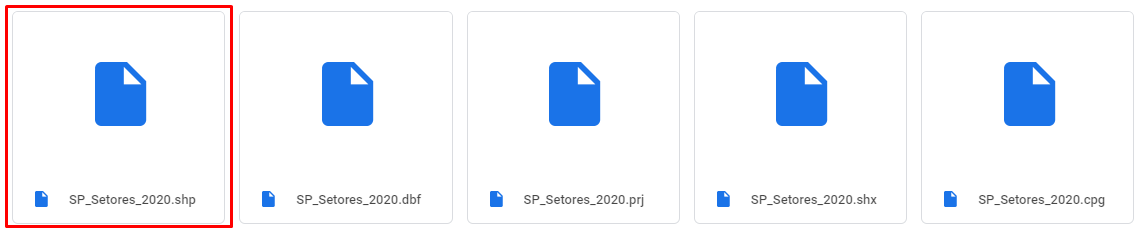

In [ ]:
setor_censo = gpd.read_file("/content/drive/MyDrive/Alura/imersao_dados4/SP_Setores_2020.shp")
setor_censo.head()

,CD_SETOR,CD_SIT,NM_SIT,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry
0,350010505000001,1,Área Urbana de Alta Densidade de Edificações,35,São Paulo,SP,3500105,Adamantina,350010505,Adamantina,35001050500,None,"POLYGON ((-51.07255 -21.68865, -51.07237 -21.6..."
1,350010505000002,1,Área Urbana de Alta Densidade de Edificações,35,São Paulo,SP,3500105,Adamantina,350010505,Adamantina,35001050500,None,"POLYGON ((-51.07378 -21.68620, -51.07388 -21.6..."
2,350010505000003,1,Área Urbana de Alta Densidade de Edificações,35,São Paulo,SP,3500105,Adamantina,350010505,Adamantina,35001050500,None,"POLYGON ((-51.07138 -21.68313, -51.06965 -21.6..."
3,350010505000004,1,Área Urbana de Alta Densidade de Edificações,35,São Paulo,SP,3500105,Adamantina,350010505,Adamantina,35001050500,None,"POLYGON ((-51.06880 -21.68808, -51.06730 -21.6..."
4,350010505000005,1,Área Urbana de Alta Densidade de Edificações,35,São Paulo,SP,3500105,Adamantina,350010505,Adamantina,35001050500,None,"POLYGON ((-51.06969 -21.69442, -51.06928 -21.6..."


Note que temos:

* Código do setor censitário na primeira coluna
* Polígono do setor censitário na última coluna

E isso é tudo o que precisamos para unir os dados dos imóveis com os dados do IBGE. Então vamos excluir as outras colunas e salvar o dataframe:

In [ ]:
setor_censo = setor_censo[['CD_SETOR', 'geometry']]
setor_censo.head()

,CD_SETOR,geometry
0,350010505000001,"POLYGON ((-51.07255 -21.68865, -51.07237 -21.6..."
1,350010505000002,"POLYGON ((-51.07378 -21.68620, -51.07388 -21.6..."
2,350010505000003,"POLYGON ((-51.07138 -21.68313, -51.06965 -21.6..."
3,350010505000004,"POLYGON ((-51.06880 -21.68808, -51.06730 -21.6..."
4,350010505000005,"POLYGON ((-51.06969 -21.69442, -51.06928 -21.6..."


In [ ]:
#setor_censo.to_csv('/content/drive/MyDrive/Alura/imersao_dados4/setor_censo.csv')

In [ ]:
#setor_censo.to_file('/content/drive/MyDrive/Alura/imersao_dados4/setor_censo.csv')

# 4 Convertendo endereços da base de imóveis df_gold em latitude e longitude

## 4.1 Construindo uma coluna de endereço completo

Agora, vamos obter as coordenadas de latitude e longitude dos endereços dos imóveis na base df_gold.

Primeiro, vamos carregar a base:

In [ ]:
df_gold = pd.read_csv('/content/drive/MyDrive/Alura/imersao_dados4/df_gold.csv')
df_gold.drop(columns = ['Unnamed: 0'], inplace = True)
df_gold.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Rua Caramuru, 100",Saúde,São Paulo,380,9,4,4,3700000
1,"Alameda Franca, 587",Jardim Paulista,São Paulo,137,9,2,1,2600000
2,"Alameda Franca, 587",Jardim Paulista,São Paulo,142,9,2,1,2600000
3,Alameda Franca,Jardim Paulista,São Paulo,150,9,2,1,2600000
4,Alameda Franca,Jardim Paulista,São Paulo,155,9,2,1,2600000


Agora, vamos construir uma coluna com o endereço completo, juntando as colunas de Rua, Bairro e Cidade:

In [ ]:
endereco = df_gold["Rua"] + " - " + df_gold["Bairro"] + ", " + df_gold["Cidade"]
endereco

0                   Rua Caramuru, 100  - Saúde, São Paulo
1       Alameda Franca, 587  - Jardim Paulista, São Paulo
2       Alameda Franca, 587  - Jardim Paulista, São Paulo
3             Alameda Franca - Jardim Paulista, São Paulo
4             Alameda Franca - Jardim Paulista, São Paulo
                              ...                        
8970                                                  NaN
8971                                                  NaN
8972    Rua Victória Simionato - Vila Paranaguá, São P...
8973    Rua Luís Botta, 1137  - Cidade São Mateus, São...
8974                                                  NaN
Length: 8975, dtype: object

Vamos adicionar o endereço completo na primeira coluna do dataframe:

In [ ]:
df_gold.insert(0, "endereco", endereco, allow_duplicates = True)
df_gold.head()

,endereco,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Rua Caramuru, 100 - Saúde, São Paulo","Rua Caramuru, 100",Saúde,São Paulo,380,9,4,4,3700000
1,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,137,9,2,1,2600000
2,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,142,9,2,1,2600000
3,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,150,9,2,1,2600000
4,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,155,9,2,1,2600000


## 4.2 Obtendo a latitude e a longitude do endereço

Esta seção foi baseada no vídeo [Como converter ENDEREÇOS em coordenadas LATITUDE e LONGITUDE | Python na Prática #18](https://www.youtube.com/watch?v=asSNKH_ee0M&t=389s&ab_channel=Programa%C3%A7%C3%A3oDin%C3%A2mica)

Para converter o endereço em latitude e longitude, usaremos a biblioteca geopy.geocoders.Nominatim

Com o Nominatim, conseguimos obter várias informações de um endereço. Por exemplo, considere o endereço do Parque Barigui, em Curitiba:

"Av. Cândido Hartmann, S/N - Bigorrilho, Curitiba - PR, 82025-160"

In [ ]:
locator = Nominatim( ) #user_agent="myGeocoder"
location = locator.geocode("Av. Cândido Hartmann, S/N - Bigorrilho, Curitiba - PR, 82025-160")
location

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


Location(Avenida Cândido Hartmann, Bigorrilho, Curitiba, Região Geográfica Imediata de Curitiba, Região Metropolitana de Curitiba, Região Geográfica Intermediária de Curitiba, Paraná, Região Sul, 80710-570, Brasil, (-25.4230874, -49.3064685, 0.0))

In [ ]:
location.address

'Avenida Cândido Hartmann, Bigorrilho, Curitiba, Região Geográfica Imediata de Curitiba, Região Metropolitana de Curitiba, Região Geográfica Intermediária de Curitiba, Paraná, Região Sul, 80710-570, Brasil'

Usando o método point, obtemos a latitude, a longitude e a altitude do endereço dado:

In [ ]:
location.point

Point(-25.4230874, -49.3064685, 0.0)

Para conferir o resultado, coloquei essas coordenadas de latitude e longitude no Google Maps:

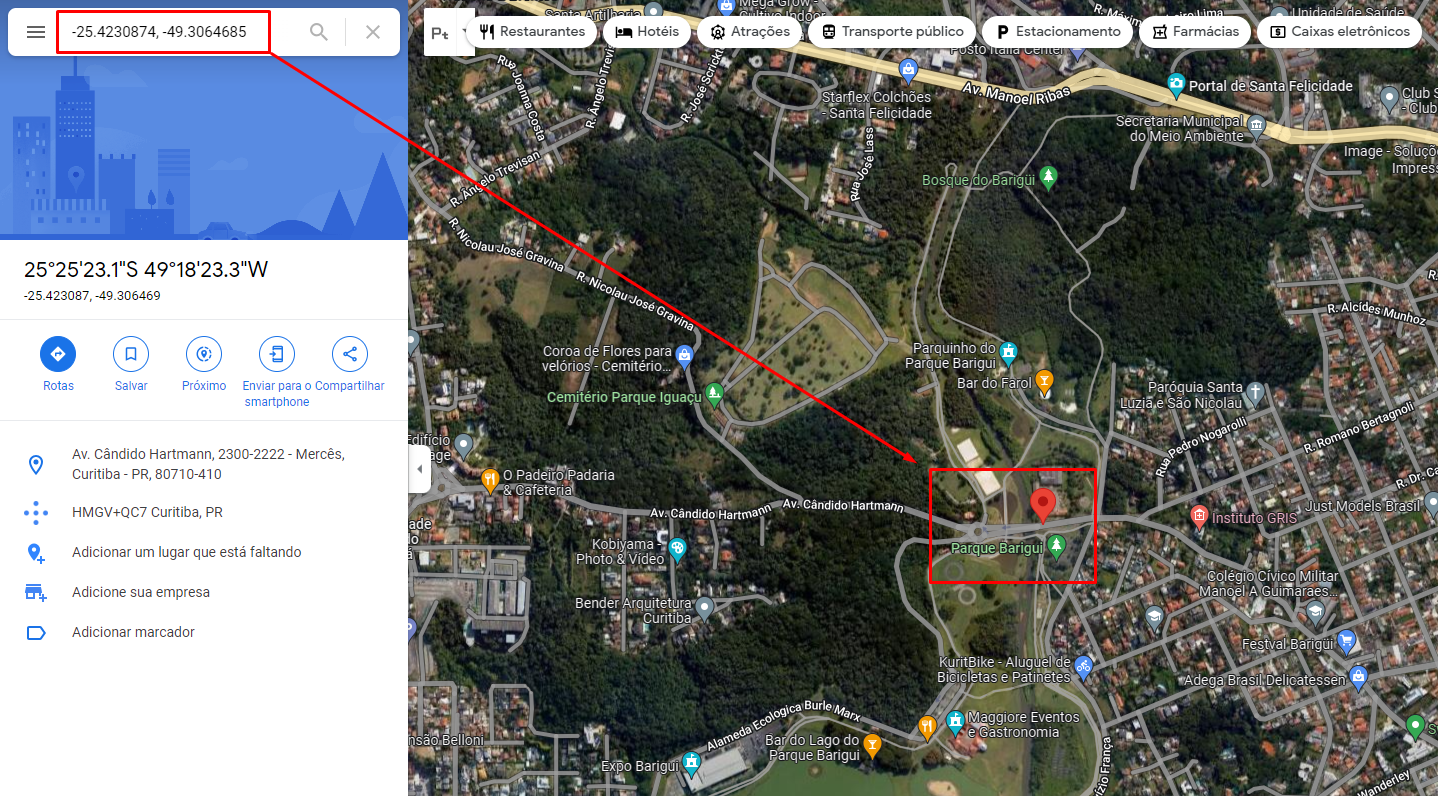

Veja que realmente funcionou.

Mas como queremos usar isso na base de dados inteira, com 8975 linhas, usaremos o RateLimiter, pois nele conseguimos passar os parâmetros:

* min_delay_seconds: tempo mínimo de espera entre as requisições, para evitar erros;
* max_retries: quantidade máxima de tentativas extras de obter um mesmo endereço, caso dê erro na primeira tentativa

In [ ]:
locator = Nominatim()
geocode = RateLimiter(locator.geocode, min_delay_seconds = 0.1, max_retries = 1)

tqdm.pandas() # isso serve apenas para exibir a barar de progresso das requisições
endereco_geolocalizado = df_gold['endereco'].progress_apply(geocode) # armazenando os endereços geolozaclizados em uma variável. Se não quisermos a barra de progresso basta usar .apply em vez de .progress_apply

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning
  2%|▏         | 154/8975 [01:20<1:16:45,  1.92it/s]RateLimiter caught an error, retrying (0/1 tries). Called with (*('Rua Anésio Pinto Rosa - Brooklin Paulista, São Paulo',), **{}).
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/geopy/geocoders/base.py", line 344, in _call_geocoder
    page = requester(req, timeout=timeout, **kwargs)
  File "/usr/lib/python3.7/urllib/request.py", line 525, in open
    response

Vejamos como está a variável com o endereço geolocalizado:

In [ ]:
endereco_geolocalizado

0       (100, Rua Caramuru, Chácara Inglesa, Saúde, Sã...
1       (Alameda Franca, Cerqueira César, Jardim Pauli...
2       (Alameda Franca, Cerqueira César, Jardim Pauli...
3       (Alameda Franca, Cerqueira César, Jardim Pauli...
4       (Alameda Franca, Cerqueira César, Jardim Pauli...
                              ...                        
8970    (Nanno, Ville d'Anaunia, Comunità della Val di...
8971    (Nanno, Ville d'Anaunia, Comunità della Val di...
8972                                                 None
8973                                                 None
8974    (Nanno, Ville d'Anaunia, Comunità della Val di...
Name: endereco, Length: 8975, dtype: object

Vamos criar um dataframe df_gold_geo que possui os dados dos imóveis e a coluna do endereço geolocalizado:

In [ ]:
df_gold_geo = df_gold
df_gold_geo['endereco_geolocalizado'] = endereco_geolocalizado
df_gold_geo.head()

,endereco,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,endereco_geolocalizado
0,"Rua Caramuru, 100 - Saúde, São Paulo","Rua Caramuru, 100",Saúde,São Paulo,380,9,4,4,3700000,"(100, Rua Caramuru, Chácara Inglesa, Saúde, Sã..."
1,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,137,9,2,1,2600000,"(Alameda Franca, Cerqueira César, Jardim Pauli..."
2,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,142,9,2,1,2600000,"(Alameda Franca, Cerqueira César, Jardim Pauli..."
3,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,150,9,2,1,2600000,"(Alameda Franca, Cerqueira César, Jardim Pauli..."
4,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,155,9,2,1,2600000,"(Alameda Franca, Cerqueira César, Jardim Pauli..."


Agora, vamos uasr a coluna do endereço geolozalizado para obter a coluna com a latitude e a longitude do endereço, usando o método .point:

In [ ]:
df_gold_geo['endereco_point'] = df_gold_geo['endereco_geolocalizado'].apply(lambda loc: tuple(loc.point)[:1] if loc else None)
df_gold_geo

AttributeError: ignored

Vejamos como é um elemento do tipo .point que estamos guardando no dataframe:

In [ ]:
df_gold_geo['endereco_point'][0], type(df_gold_geo['endereco_point'][0])

((-23.604879631024357, -46.63654708002167, 0.0), tuple)

Veja que as colunas de endereços que adicionamos são do tipo object:

In [ ]:
df_gold_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8975 entries, 0 to 8974
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   endereco                5998 non-null   object
 1   Rua                     6008 non-null   object
 2   Bairro                  8965 non-null   object
 3   Cidade                  8975 non-null   object
 4   Metragem                8975 non-null   int64 
 5   Quartos                 8975 non-null   int64 
 6   Banheiros               8975 non-null   int64 
 7   Vagas                   8975 non-null   int64 
 8   Valor                   8975 non-null   int64 
 9   endereco_geolocalizado  5898 non-null   object
 10  endereco_point          5898 non-null   object
dtypes: int64(5), object(6)
memory usage: 771.4+ KB


Por fim, vamos salvar esse arquivo no drive. Ele também ficará disponível no github na pasta [arquivos do repositório deste projeto](https://github.com/gustavor10silva/alura_imersao_dados_4/tree/main/arquivos).

In [ ]:
df_gold_geo.to_csv('/content/drive/MyDrive/Alura/imersao_dados4/df_gold_geo.csv')

# 5 Cruzando todas as bases

Queremos cruzar os dados do Censo de 2010 (dataframe dados_ibge) com os dados dos imóveis que já tratamos e inserimos as colunas de dados geográficos(dataframe df_gold_geo).

Para fazer esse cruzamento de dados, usaremos a tabela setor_censo com os polígonos dos setores censitários, conforme a lógica abaixo:

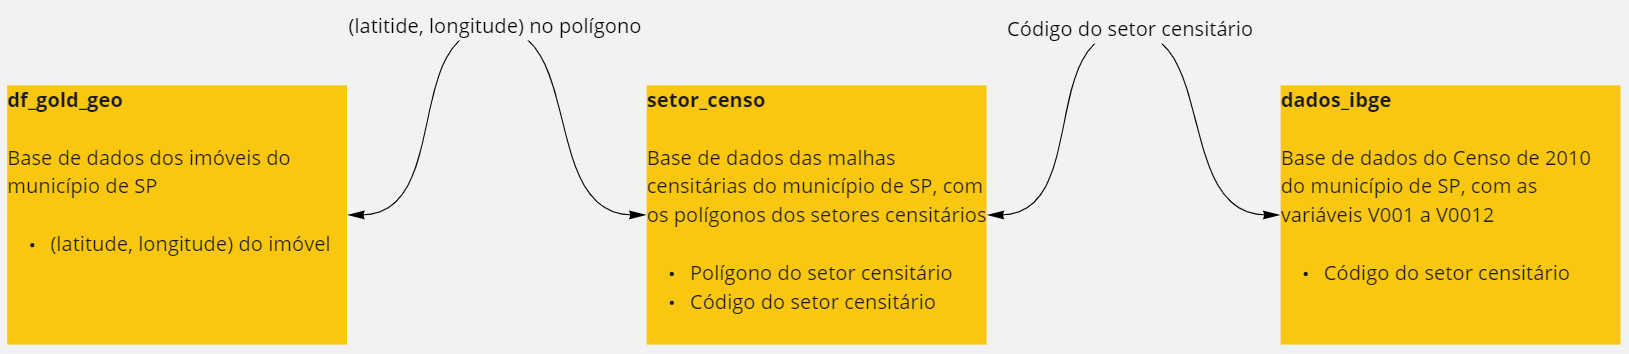

Ou seja, vamos fazer o seguinte:

* **Passo 1:** Conectar a base de imóveis df_gold_geo com a base setor_censo analisando se o ponto (latitude, longitude) está dentro do polígono que define o setor censitário
* **Passo 2:** Conectar essas bases com a base ibge_sp por meio do código do setor censitário

Com isso, teremos os dados dos imóveis junto com as variáveis do Censo 2010 no mesmo dataframe. Agora, vamos aos passos 1 e 2.

## 5.1 Conectando df_gold_geo com setor_censo usando os polígonos

Importando o dataframe df_gold_geo:

In [ ]:
df_gold_geo = pd.read_csv('/content/drive/MyDrive/Alura/imersao_dados4/df_gold_geo.csv')
df_gold_geo.drop(columns = ['Unnamed: 0'], inplace = True)
df_gold_geo.head()

,endereco,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,endereco_geolocalizado,endereco_point
0,"Rua Caramuru, 100 - Saúde, São Paulo","Rua Caramuru, 100",Saúde,São Paulo,380,9,4,4,3700000,"100, Rua Caramuru, Chácara Inglesa, Saúde, São...","(-23.604879631024357, -46.63654708002167, 0.0)"
1,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,137,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)"
2,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,142,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)"
3,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,150,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)"
4,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,155,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)"


Importando o dataframe setor_censo:

In [ ]:
setor_censo = gpd.read_file("/content/drive/MyDrive/Alura/imersao_dados4/SP_Setores_2020.shp")
setor_censo = setor_censo[['CD_SETOR', 'geometry']]
setor_censo.head()

,CD_SETOR,geometry
0,350010505000001,"POLYGON ((-51.0725461589999 -21.6886483599999,..."
1,350010505000002,"POLYGON ((-51.073782637 -21.686196069999898, -..."
2,350010505000003,"POLYGON ((-51.0713770719999 -21.683128155, -51..."
3,350010505000004,"POLYGON ((-51.0687996999999 -21.6880825179999,..."
4,350010505000005,"POLYGON ((-51.0696908039999 -21.6944240129999,..."


Veja que o point está em formato de string na ordem:

'(latitude, longitude, altitude)'

In [ ]:
df_gold_geo['endereco_point'][0]

'(-23.604879631024357, -46.63654708002167, 0.0)'

Precisamos que o point esteja no formato

'(longitude, latitude)'

então vamos criar as colunas de latitude, longitude e uma coluna para inserirmos o point no formato que precisamos:

In [ ]:
df_gold_geo['latitude'] = ''
df_gold_geo['longitude'] = ''
df_gold_geo['point'] = ''

df_gold_geo.endereco_point.astype(str)

for i in range(len(df_gold_geo)):
    try:
        df_gold_geo['latitude'][i] = float(df_gold_geo['endereco_point'][i].split(',')[0].replace('(', ''))
        df_gold_geo['longitude'][i] = float(df_gold_geo['endereco_point'][i].split(',')[1].replace('(', ''))
    except:
        pass

    try:
        df_gold_geo['point'][i] = Point(df_gold_geo['longitude'][i], df_gold_geo['latitude'][i])
    except:
        pass

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernel

In [ ]:
df_gold_geo.head()

,endereco,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,endereco_geolocalizado,endereco_point,latitude,longitude,point
0,"Rua Caramuru, 100 - Saúde, São Paulo","Rua Caramuru, 100",Saúde,São Paulo,380,9,4,4,3700000,"100, Rua Caramuru, Chácara Inglesa, Saúde, São...","(-23.604879631024357, -46.63654708002167, 0.0)",-23.60488,-46.636547,POINT (-46.63654708002167 -23.604879631024357)
1,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,137,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.560956,-46.664705,POINT (-46.6647052 -23.5609563)
2,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,142,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.560956,-46.664705,POINT (-46.6647052 -23.5609563)
3,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,150,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.560956,-46.664705,POINT (-46.6647052 -23.5609563)
4,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,155,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.560956,-46.664705,POINT (-46.6647052 -23.5609563)


O que vamos usar para verificar à qual setor censitário o point pertence é o seguinte:

In [ ]:
setor_censo[setor_censo.contains(Point(-46.63, -23.58))]['CD_SETOR']

91048    355030890000401
Name: CD_SETOR, dtype: object

Agora, vamos fazer o mesmo para o dataframe df_gold_geo inteiro. Depois disso, finalmente teremos os dados dos imóveis no mesmo dataframe que as variáveis do Censo de 2010:

In [ ]:
total = len(df_gold_geo)
df_gold_geo['setor_censo'] = ''

contador = 1
for i in range(len(df_gold_geo)):

    try:
        ponto = df_gold_geo['point'][i]
        df_gold_geo['setor_censo'][i] = int(setor_censo[setor_censo.contains(ponto)]['CD_SETOR'])

    except:
        pass
        
    print(contador, ' / ', total, ' = ', int((contador/total)*100), '%')
    contador += 1

A saída de streaming foi truncada nas últimas 5000 linhas.
3976  /  8975  =  44 %
3977  /  8975  =  44 %
3978  /  8975  =  44 %
3979  /  8975  =  44 %
3980  /  8975  =  44 %
3981  /  8975  =  44 %
3982  /  8975  =  44 %
3983  /  8975  =  44 %
3984  /  8975  =  44 %
3985  /  8975  =  44 %
3986  /  8975  =  44 %
3987  /  8975  =  44 %
3988  /  8975  =  44 %
3989  /  8975  =  44 %
3990  /  8975  =  44 %
3991  /  8975  =  44 %
3992  /  8975  =  44 %
3993  /  8975  =  44 %
3994  /  8975  =  44 %
3995  /  8975  =  44 %
3996  /  8975  =  44 %
3997  /  8975  =  44 %
3998  /  8975  =  44 %
3999  /  8975  =  44 %
4000  /  8975  =  44 %
4001  /  8975  =  44 %
4002  /  8975  =  44 %
4003  /  8975  =  44 %
4004  /  8975  =  44 %
4005  /  8975  =  44 %
4006  /  8975  =  44 %
4007  /  8975  =  44 %
4008  /  8975  =  44 %
4009  /  8975  =  44 %
4010  /  8975  =  44 %
4011  /  8975  =  44 %
4012  /  8975  =  44 %
4013  /  8975  =  44 %
4014  /  8975  =  44 %
4015  /  8975  =  44 %
4016  /  8975  =  44 

Salvarei isso no drive como dados_imoveis_setor.csv:

In [ ]:
df_gold_geo.to_csv('/content/drive/MyDrive/Alura/imersao_dados4/dados_imoveis_setor.csv')

In [ ]:
dados_imoveis_setor = pd.read_csv('/content/drive/MyDrive/Alura/imersao_dados4/dados_imoveis_setor.csv')
dados_imoveis_setor.drop(columns = ['Unnamed: 0'], inplace = True)
dados_imoveis_setor.head()

,endereco,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,endereco_geolocalizado,endereco_point,latitude,longitude,point,setor_censo
0,"Rua Caramuru, 100 - Saúde, São Paulo","Rua Caramuru, 100",Saúde,São Paulo,380,9,4,4,3700000,"100, Rua Caramuru, Chácara Inglesa, Saúde, São...","(-23.604879631024357, -46.63654708002167, 0.0)",-23.604880,-46.636547,POINT (-46.63654708002167 -23.604879631024357),3.550309e+14
1,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,137,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.560956,-46.664705,POINT (-46.6647052 -23.5609563),3.550308e+14
2,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,142,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.560956,-46.664705,POINT (-46.6647052 -23.5609563),3.550308e+14
3,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,150,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.560956,-46.664705,POINT (-46.6647052 -23.5609563),3.550308e+14
4,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,155,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.560956,-46.664705,POINT (-46.6647052 -23.5609563),3.550308e+14


In [ ]:
dados_imoveis_setor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8975 entries, 0 to 8974
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              8975 non-null   int64  
 1   endereco                5998 non-null   object 
 2   Rua                     6008 non-null   object 
 3   Bairro                  8965 non-null   object 
 4   Cidade                  8975 non-null   object 
 5   Metragem                8975 non-null   int64  
 6   Quartos                 8975 non-null   int64  
 7   Banheiros               8975 non-null   int64  
 8   Vagas                   8975 non-null   int64  
 9   Valor                   8975 non-null   int64  
 10  endereco_geolocalizado  5898 non-null   object 
 11  endereco_point          5898 non-null   object 
 12  latitude                5898 non-null   float64
 13  longitude               5898 non-null   float64
 14  point                   5898 non-null   

In [ ]:
for i in range(len(dados_imoveis_setor)):
    cod = dados_imoveis_setor['setor_censo'][i]
    try:
        dados_imoveis_setor['setor_censo'][i] = int("%.0f" %cod)
    except:
        pass

In [ ]:
dados_imoveis_setor.head()

,endereco,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,endereco_geolocalizado,endereco_point,latitude,longitude,point,setor_censo,setor_censo_int,setor_censo_str
0,"Rua Caramuru, 100 - Saúde, São Paulo","Rua Caramuru, 100",Saúde,São Paulo,380,9,4,4,3700000,"100, Rua Caramuru, Chácara Inglesa, Saúde, São...","(-23.604879631024357, -46.63654708002167, 0.0)",-23.604880,-46.636547,POINT (-46.63654708002167 -23.604879631024357),3.550309e+14,355030877000565.0,355030877000565.0
1,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,137,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.560956,-46.664705,POINT (-46.6647052 -23.5609563),3.550308e+14,355030845000247.0,355030845000247.0
2,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,142,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.560956,-46.664705,POINT (-46.6647052 -23.5609563),3.550308e+14,355030845000247.0,355030845000247.0
3,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,150,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.560956,-46.664705,POINT (-46.6647052 -23.5609563),3.550308e+14,355030845000247.0,355030845000247.0
4,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,155,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.560956,-46.664705,POINT (-46.6647052 -23.5609563),3.550308e+14,355030845000247.0,355030845000247.0


In [ ]:
dados_imoveis_setor['setor_censo'][0]

355030877000565.0

In [ ]:
a = dados_imoveis_setor['setor_censo'][0]
a

355030877000565.0

In [ ]:
a = int("%.0f" %a)
a

355030877000565

In [ ]:
type(a)

int

## 5.2 Conectando base_imoveis_setor com dados_ibge usando o código do setor censitário

In [37]:
dados_imoveis_setor = pd.read_csv('/content/drive/MyDrive/Alura/imersao_dados4/dados_imoveis_setor.csv')
dados_imoveis_setor.drop(columns = ['Unnamed: 0'], inplace = True)
dados_imoveis_setor.head()

,endereco,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,endereco_geolocalizado,endereco_point,latitude,longitude,point,setor_censo
0,"Rua Caramuru, 100 - Saúde, São Paulo","Rua Caramuru, 100",Saúde,São Paulo,380,9,4,4,3700000,"100, Rua Caramuru, Chácara Inglesa, Saúde, São...","(-23.604879631024357, -46.63654708002167, 0.0)",-23.60,-46.64,POINT (-46.63654708002167 -23.604879631024357),355030877000565.00
1,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,137,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.56,-46.66,POINT (-46.6647052 -23.5609563),355030845000247.00
2,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,142,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.56,-46.66,POINT (-46.6647052 -23.5609563),355030845000247.00
3,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,150,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.56,-46.66,POINT (-46.6647052 -23.5609563),355030845000247.00
4,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,155,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.56,-46.66,POINT (-46.6647052 -23.5609563),355030845000247.00


In [38]:
dados_imoveis_setor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8975 entries, 0 to 8974
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   endereco                5998 non-null   object 
 1   Rua                     6008 non-null   object 
 2   Bairro                  8965 non-null   object 
 3   Cidade                  8975 non-null   object 
 4   Metragem                8975 non-null   int64  
 5   Quartos                 8975 non-null   int64  
 6   Banheiros               8975 non-null   int64  
 7   Vagas                   8975 non-null   int64  
 8   Valor                   8975 non-null   int64  
 9   endereco_geolocalizado  5898 non-null   object 
 10  endereco_point          5898 non-null   object 
 11  latitude                5898 non-null   float64
 12  longitude               5898 non-null   float64
 13  point                   5898 non-null   object 
 14  setor_censo             2920 non-null   

In [31]:
pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [46]:
dados_imoveis_setor.head(2)

,endereco,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,endereco_geolocalizado,endereco_point,latitude,longitude,point,setor_censo
0,"Rua Caramuru, 100 - Saúde, São Paulo","Rua Caramuru, 100",Saúde,São Paulo,380,9,4,4,3700000,"100, Rua Caramuru, Chácara Inglesa, Saúde, São...","(-23.604879631024357, -46.63654708002167, 0.0)",-23.60,-46.64,POINT (-46.63654708002167 -23.604879631024357),355030877000565.00
1,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,137,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.56,-46.66,POINT (-46.6647052 -23.5609563),355030845000247.00


In [42]:
dados_imoveis_setor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8975 entries, 0 to 8974
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   endereco                5998 non-null   object 
 1   Rua                     6008 non-null   object 
 2   Bairro                  8965 non-null   object 
 3   Cidade                  8975 non-null   object 
 4   Metragem                8975 non-null   int64  
 5   Quartos                 8975 non-null   int64  
 6   Banheiros               8975 non-null   int64  
 7   Vagas                   8975 non-null   int64  
 8   Valor                   8975 non-null   int64  
 9   endereco_geolocalizado  5898 non-null   object 
 10  endereco_point          5898 non-null   object 
 11  latitude                5898 non-null   float64
 12  longitude               5898 non-null   float64
 13  point                   5898 non-null   object 
 14  setor_censo             2920 non-null   

In [50]:
dados_imoveis_setor['setor_censo'] = dados_imoveis_setor['setor_censo'].astype(str)
dados_imoveis_setor.head(2)

,endereco,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,endereco_geolocalizado,endereco_point,latitude,longitude,point,setor_censo
0,"Rua Caramuru, 100 - Saúde, São Paulo","Rua Caramuru, 100",Saúde,São Paulo,380,9,4,4,3700000,"100, Rua Caramuru, Chácara Inglesa, Saúde, São...","(-23.604879631024357, -46.63654708002167, 0.0)",-23.60,-46.64,POINT (-46.63654708002167 -23.604879631024357),355030877000565.0
1,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,137,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...","(-23.5609563, -46.6647052, 0.0)",-23.56,-46.66,POINT (-46.6647052 -23.5609563),355030845000247.0


In [51]:
dados_imoveis_setor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8975 entries, 0 to 8974
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   endereco                5998 non-null   object 
 1   Rua                     6008 non-null   object 
 2   Bairro                  8965 non-null   object 
 3   Cidade                  8975 non-null   object 
 4   Metragem                8975 non-null   int64  
 5   Quartos                 8975 non-null   int64  
 6   Banheiros               8975 non-null   int64  
 7   Vagas                   8975 non-null   int64  
 8   Valor                   8975 non-null   int64  
 9   endereco_geolocalizado  5898 non-null   object 
 10  endereco_point          5898 non-null   object 
 11  latitude                5898 non-null   float64
 12  longitude               5898 non-null   float64
 13  point                   5898 non-null   object 
 14  setor_censo             8975 non-null   

In [52]:
dados_ibge = pd.read_csv('/content/drive/MyDrive/Alura/imersao_dados4/dados_ibge.csv')
dados_ibge.drop(columns = ['Unnamed: 0'], inplace = True)
dados_ibge.head()

,basico_sp1_Cod_setor,basico_sp1_Situacao_setor,basico_sp1_V001,basico_sp1_V002,basico_sp1_V003,basico_sp1_V004,basico_sp1_V005,basico_sp1_V006,domicilio01_sp1_Cod_setor,domicilio01_sp1_V001,domicilio01_sp1_V002,V012,domicilio01_sp1_V017,domicilio01_sp1_V023,domicilio01_sp1_V035,domicilio01_sp1_V043,pessoa01_sp1_Cod_setor,pessoa01_sp1_V001,pessoa03_sp1_Cod_setor,pessoa03_sp1_V001
0,355030801000001,1,266.00,800.00,3.01,2.32,2091.32,8532451.78,355030801000001,268,266,266,266,0,265,266,355030801000001,742,355030801000001,806
1,355030801000002,1,306.00,913.00,2.98,2.09,1650.09,3983441.31,355030801000002,306,306,306,306,0,306,306,355030801000002,833,355030801000002,913
2,355030801000003,1,189.00,625.00,3.31,3.08,1280.43,5474593.06,355030801000003,189,189,189,187,0,189,189,355030801000003,575,355030801000003,625
3,355030801000004,1,181.00,572.00,3.16,2.26,1119.59,3572955.10,355030801000004,181,181,181,181,0,181,181,355030801000004,530,355030801000004,572
4,355030801000005,1,240.00,754.00,3.14,2.35,1416.90,2240207.58,355030801000005,240,240,240,240,0,240,240,355030801000005,678,355030801000005,754


In [54]:
dados_ibge['basico_sp1_Cod_setor'] = dados_ibge['basico_sp1_Cod_setor'].astype(float).astype(str)
dados_ibge.head(2)

,basico_sp1_Cod_setor,basico_sp1_Situacao_setor,basico_sp1_V001,basico_sp1_V002,basico_sp1_V003,basico_sp1_V004,basico_sp1_V005,basico_sp1_V006,domicilio01_sp1_Cod_setor,domicilio01_sp1_V001,domicilio01_sp1_V002,V012,domicilio01_sp1_V017,domicilio01_sp1_V023,domicilio01_sp1_V035,domicilio01_sp1_V043,pessoa01_sp1_Cod_setor,pessoa01_sp1_V001,pessoa03_sp1_Cod_setor,pessoa03_sp1_V001
0,355030801000001.0,1,266.00,800.00,3.01,2.32,2091.32,8532451.78,355030801000001,268,266,266,266,0,265,266,355030801000001,742,355030801000001,806
1,355030801000002.0,1,306.00,913.00,2.98,2.09,1650.09,3983441.31,355030801000002,306,306,306,306,0,306,306,355030801000002,833,355030801000002,913


In [55]:
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   basico_sp1_Cod_setor       18363 non-null  object 
 1   basico_sp1_Situacao_setor  18363 non-null  int64  
 2   basico_sp1_V001            18333 non-null  float64
 3   basico_sp1_V002            18333 non-null  float64
 4   basico_sp1_V003            18333 non-null  float64
 5   basico_sp1_V004            18333 non-null  float64
 6   basico_sp1_V005            18333 non-null  float64
 7   basico_sp1_V006            18333 non-null  float64
 8   domicilio01_sp1_Cod_setor  18363 non-null  int64  
 9   domicilio01_sp1_V001       18363 non-null  int64  
 10  domicilio01_sp1_V002       18363 non-null  int64  
 11  V012                       18363 non-null  object 
 12  domicilio01_sp1_V017       18363 non-null  object 
 13  domicilio01_sp1_V023       18363 non-null  obj

In [57]:
df_imoveis_ibge = pd.merge(left = dados_imoveis_setor, right = dados_ibge, how = "left", left_on = "setor_censo", right_on = "basico_sp1_Cod_setor")
df_imoveis_ibge

,endereco,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,endereco_geolocalizado,...,domicilio01_sp1_V002,V012,domicilio01_sp1_V017,domicilio01_sp1_V023,domicilio01_sp1_V035,domicilio01_sp1_V043,pessoa01_sp1_Cod_setor,pessoa01_sp1_V001,pessoa03_sp1_Cod_setor,pessoa03_sp1_V001
0,"Rua Caramuru, 100 - Saúde, São Paulo","Rua Caramuru, 100",Saúde,São Paulo,380,9,4,4,3700000,"100, Rua Caramuru, Chácara Inglesa, Saúde, São...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,137,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Alameda Franca, 587 - Jardim Paulista, São Paulo","Alameda Franca, 587",Jardim Paulista,São Paulo,142,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,150,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Alameda Franca - Jardim Paulista, São Paulo",Alameda Franca,Jardim Paulista,São Paulo,155,9,2,1,2600000,"Alameda Franca, Cerqueira César, Jardim Paulis...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8970,NaN,NaN,Vila Nova Curuçá,São Paulo,107,1,1,1,188682,"Nanno, Ville d'Anaunia, Comunità della Val di ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8971,NaN,NaN,Vila Nova Curuçá,São Paulo,112,1,1,1,188682,"Nanno, Ville d'Anaunia, Comunità della Val di ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8972,"Rua Victória Simionato - Vila Paranaguá, São P...",Rua Victória Simionato,Vila Paranaguá,São Paulo,45,1,1,1,160000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8973,"Rua Luís Botta, 1137 - Cidade São Mateus, São...","Rua Luís Botta, 1137",Cidade São Mateus,São Paulo,61,1,1,1,147288,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_imoveis_ibge[['setor_censo', 'basico_sp1_Cod_setor']]

,setor_censo,basico_sp1_Cod_setor
0,355030877000565.0,NaN
1,355030845000247.0,NaN
2,355030845000247.0,NaN
3,355030845000247.0,NaN
4,355030845000247.0,NaN
...,...,...
8970,nan,NaN
8971,nan,NaN
8972,nan,NaN
8973,nan,NaN


In [61]:
for i in range(len(df_imoveis_ibge)):
    print(df_imoveis_ibge['basico_sp1_Cod_setor'][i])

A saída de streaming foi truncada nas últimas 5000 linhas.
355030802000062.0
355030802000062.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
355030862000064.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
355030862000167.0
nan
nan
nan
355030802000070.0
nan
nan
nan
355030860000014.0
nan
355030867000168.0
nan
355030867000168.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
355030832000015.0
355030832000015.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
355030802000014.0
nan
nan
nan
nan
nan
nan
355030894000252.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
355030835000050.0
355030835000050.0
nan
nan
nan
nan
nan
nan
355030826000041.0
nan
nan
nan
355030854000129.0
nan
nan
nan
nan
nan
nan
nan
355030862000112.0
355030854000129.0
355030835000050.0
nan
nan
nan
nan
nan
nan
nan
nan
355030802000062.0
355030888000024.0
355030888000024.0
nan
nan
nan
nan
nan
355030802000062.0
355030802000062.0
355030802000062.0

In [62]:
for i in range(len(df_imoveis_ibge)):
    print(dados_ibge['basico_sp1_Cod_setor'][i])

A saída de streaming foi truncada nas últimas 5000 linhas.
355030824000101.0
355030824000102.0
355030824000103.0
355030824000104.0
355030824000105.0
355030824000106.0
355030824000107.0
355030824000108.0
355030824000109.0
355030824000110.0
355030824000111.0
355030824000112.0
355030824000113.0
355030824000114.0
355030824000115.0
355030824000116.0
355030824000117.0
355030824000118.0
355030824000119.0
355030824000120.0
355030824000121.0
355030824000122.0
355030824000123.0
355030824000124.0
355030824000125.0
355030824000126.0
355030824000127.0
355030824000128.0
355030824000129.0
355030824000130.0
355030824000131.0
355030824000132.0
355030824000133.0
355030824000134.0
355030824000135.0
355030824000136.0
355030824000137.0
355030824000138.0
355030824000139.0
355030824000140.0
355030824000141.0
355030824000142.0
355030824000143.0
355030824000144.0
355030824000145.0
355030824000146.0
355030824000147.0
355030824000148.0
355030824000149.0
355030824000150.0
355030824000151.0
355030824000152.0
35503

In [64]:
df_imoveis_ibge.to_csv('/content/drive/MyDrive/Alura/imersao_dados4/df_imoveis_ibge.csv')